# Exploratory Data Analysis

Before diving into advanced analysis or modeling, it’s essential to **understand your dataset**.
Exploratory inspection helps identify:

* How much data you have
* What each column represents
* Whether data types are correct
* If any missing or inconsistent values exist
* General patterns in numeric and categorical data

Python’s **pandas** library provides quick and powerful methods to get these insights.

---

## 📦 1. Loading and Viewing the Dataset

Let’s assume you have a dataset called `sales_data.csv`.

```python
import pandas as pd

# Load the dataset
df = pd.read_csv("sales_data.csv")

# Display the first few rows
df.head()
```

`df.head()` shows the first 5 rows by default, helping you confirm that the file loaded correctly and that columns look right.

You can also view the **last few rows** using:

```python
df.tail()
```

---

## 🧱 2. Checking Dataset Dimensions and Structure

### Shape of the Data

```python
df.shape
```

* Returns a tuple `(rows, columns)`
* Example output: `(1000, 12)` means 1000 rows and 12 columns.

### Columns in the Dataset

```python
df.columns
```

Shows the names of all columns — useful to identify typos or extra spaces in column names.

---

## 🔍 3. Getting an Overview of Data Types and Memory Usage

```python
df.info()
```

This command provides:

* Number of **non-null** values (helpful for spotting missing data)
* Each column’s **data type** (object, int64, float64, bool, datetime64, etc.)
* Approximate **memory usage**

Example output:

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
...
dtypes: int64(3), float64(4), object(5)
```

💡 **Tip for teaching:**
You can tell students that pandas automatically guesses the datatype — but it may not always be correct (e.g., numeric values sometimes load as “object” due to stray text).

---

## 📊 4. Understanding Data Distributions

Use `.describe()` to get summary statistics of **numerical columns**.

```python
df.describe()
```

Output:

|       | sales  | profit | discount |
| ----- | ------ | ------ | -------- |
| count | 1000.0 | 1000.0 | 1000.0   |
| mean  | 120.5  | 20.4   | 0.05     |
| std   | 35.2   | 10.1   | 0.02     |
| min   | 50.0   | 2.0    | 0.00     |
| 25%   | 95.0   | 12.0   | 0.03     |
| 50%   | 118.0  | 19.5   | 0.05     |
| 75%   | 140.0  | 28.0   | 0.06     |
| max   | 200.0  | 45.0   | 0.10     |

💡 If your dataset includes categorical columns (like “Region” or “Product Category”), use:

```python
df.describe(include='object')
```

---

## 🚨 5. Detecting Missing Values

To identify missing data:

```python
df.isnull().sum()
```

This shows how many missing entries exist in each column.

Example:

```
Customer_ID       0
Sales             0
Profit            5
Discount          0
Region           12
dtype: int64
```

If you just want to know whether **any** missing values exist:

```python
df.isnull().values.any()
```

---

## 🧮 6. Checking Data Types Quickly

```python
df.dtypes
```

Helps confirm that each column has the correct data type before performing operations.

For example:

```
Sales       float64
Profit      float64
Region       object
Date     datetime64[ns]
```

If a column like “Date” is not recognized as datetime, you can fix it using:

```python
df["Date"] = pd.to_datetime(df["Date"])
```

---

## 🧠 7. Quick Data Insights (Mini EDA)

A few additional commands to peek deeper:

```python
# Unique values in a column
df["Region"].unique()

# Count of unique entries
df["Region"].nunique()

# Frequency of each category
df["Region"].value_counts()

# Correlation between numeric variables
df.corr(numeric_only=True)
```

These help you find relationships or errors (e.g., duplicate region names like “South” vs “south”).

---

## 💬 Teaching Moment: “Python is your Data Mirror”

Tell your students:

> “Your dataset always speaks through these commands. If you learn to listen, it will reveal its secrets — whether that’s missing values, wrong data types, or suspicious outliers.”

---

## 🧩 Practice Questions

1. Load a dataset named `employees.csv`. Show its shape, columns, and the first five rows.
2. Use `.info()` and identify any columns with missing values.
3. Display summary statistics for numeric columns using `.describe()`.
4. Get the number of unique departments in your dataset.
5. Find which column has the highest number of missing values.
6. Convert a “JoinDate” column to `datetime` type.
7. Print all column names that have datatype `object`.
8. Use `.isnull().sum()` to find missing values per column.
9. Find correlations between `Salary`, `Experience`, and `Performance_Score`.
10. Using `.value_counts()`, find which department has the most employees.




## 🧩 Complex DataFrame Manipulations

Data manipulation lies at the heart of every data analysis process. Once a dataset is loaded into a Pandas DataFrame, the next step is to explore, filter, summarize, and transform it to extract meaningful insights. In this section, we’ll cover powerful techniques for **filtering data**, **grouping with aggregation**, **creating pivot tables**, **adding calculated columns**, and **identifying top-performing records**.

---

### 🎯 Learning Objectives

By the end of this section, you will be able to:

* Filter DataFrame rows using **multiple logical conditions**
* Perform **grouped aggregations** with `groupby()`
* Create **pivot tables** for multi-dimensional summaries
* Add **new calculated columns** using existing data
* Identify **top-performing records** efficiently

---

### 🧮 1. Filtering Rows Based on Multiple Conditions

Filtering allows you to select only the data that meets certain criteria. Pandas uses **boolean indexing** to achieve this.

```python
import pandas as pd

# Sample dataset
data = {
    'Employee': ['Asha', 'Raj', 'Kiran', 'Meera', 'Vikram'],
    'Department': ['Sales', 'Finance', 'Sales', 'HR', 'Finance'],
    'Salary': [45000, 55000, 60000, 40000, 58000],
    'Experience': [2, 5, 4, 3, 6]
}
df = pd.DataFrame(data)

# Filter employees in Sales with Salary above 45,000
filtered = df[(df['Department'] == 'Sales') & (df['Salary'] > 45000)]
print(filtered)
```

💡 **Explanation:**

* Use `&` for **AND** and `|` for **OR** conditions.
* Always wrap each condition in parentheses.

---

### 📊 2. Grouping Data with Aggregation

Grouping helps summarize large datasets into meaningful statistics. The `groupby()` function is one of the most powerful tools in Pandas.

```python
# Average salary by department
grouped = df.groupby('Department')['Salary'].mean()
print(grouped)

# Multiple aggregations
agg_result = df.groupby('Department').agg({'Salary': ['mean', 'max'], 'Experience': 'mean'})
print(agg_result)
```

💡 **Explanation:**

* You can compute multiple aggregations for each group.
* The result is often a **MultiIndex DataFrame**, which can be flattened later for easier access.

---

### 🪄 3. Creating Pivot Tables

Pivot tables allow you to summarize and reshape data interactively, similar to Excel.

```python
pivot = pd.pivot_table(
    df,
    values='Salary',
    index='Department',
    columns='Experience',
    aggfunc='mean',
    fill_value=0
)
print(pivot)
```

💡 **Explanation:**

* `index` defines rows, `columns` defines columns, and `values` defines what to aggregate.
* You can specify aggregation functions like `mean`, `sum`, or even custom functions.

---

### ➕ 4. Adding Calculated Columns

You can create new columns derived from existing ones. This is essential for analysis and feature engineering.

```python
# Add a 10% bonus to each salary
df['Bonus'] = df['Salary'] * 0.10
df['Total Pay'] = df['Salary'] + df['Bonus']
print(df)
```

💡 **Explanation:**

* You can perform vectorized operations directly on DataFrame columns.
* Avoid loops — Pandas operations are faster and cleaner.

---

### 🏆 5. Identifying Top-Performing Records

To find the highest or lowest values based on a condition, use `nlargest()` or `nsmallest()`.

```python
# Top 2 highest salaries
top_salaries = df.nlargest(2, 'Salary')
print(top_salaries)

# Top employee in each department
top_by_dept = df.sort_values('Salary', ascending=False).groupby('Department').head(1)
print(top_by_dept)
```

💡 **Explanation:**

* `nlargest()` is faster than sorting when you only need top results.
* Combining with `groupby()` helps identify top performers per group.

---

### 🧠 Practical Exercise

Try the following tasks using your dataset:

1. Filter records where `Experience > 3` and `Salary < 60000`.
2. Group data by `Department` and calculate both **average** and **maximum** salaries.
3. Create a pivot table showing **average salary** by `Department` and `Experience`.
4. Add a column `Tax` = 10% of `Salary`, and compute `Net Salary` = `Salary - Tax`.
5. Find the **top 3 employees** with the highest total pay.
6. For each department, display the employee with **maximum experience**.
7. Filter all employees whose names start with `'A'` or `'M'`.
8. Add a calculated column for **Years Until Retirement** assuming retirement age is 60.
9. Identify the **lowest paid employee** in each department.
10. Create a report summarizing total salary and average experience by department.

---



## 🧭 Advanced DataFrame Indexing & Selection

After learning how to manipulate and summarize data, the next step is mastering **indexing and selection** — the key to slicing, dicing, and extracting precise data subsets efficiently.

Pandas provides multiple ways to access rows, columns, and specific cells — each suited for different situations. Understanding them deeply makes your analysis cleaner and faster.

---

### 🎯 Learning Objectives

By the end of this section, you will be able to:

* Select rows and columns using **`.loc[]`** and **`.iloc[]`**
* Apply **boolean indexing** for flexible filtering
* **Set and reset** indices dynamically
* Slice data using conditions and custom logic

---

### 🧱 1. Selecting Rows and Columns Using `.loc[]` and `.iloc[]`

#### `.loc[]` → **Label-based indexing**

You use actual labels (names) of rows and columns.

```python
import pandas as pd

data = {
    'Name': ['Asha', 'Raj', 'Kiran', 'Meera', 'Vikram'],
    'Department': ['Sales', 'Finance', 'Sales', 'HR', 'Finance'],
    'Salary': [45000, 55000, 60000, 40000, 58000],
    'Experience': [2, 5, 4, 3, 6]
}

df = pd.DataFrame(data, index=['E1', 'E2', 'E3', 'E4', 'E5'])

# Select a single row and specific columns using labels
print(df.loc['E3', ['Name', 'Salary']])

# Select multiple rows
print(df.loc[['E1', 'E5'], :])
```

#### `.iloc[]` → **Integer position-based indexing**

You use integer positions instead of names.

```python
# Select third row (index position 2)
print(df.iloc[2])

# Select first three rows and first two columns
print(df.iloc[0:3, 0:2])
```

💡 **Key difference:**

* `.loc[]` → Use labels
* `.iloc[]` → Use numeric positions

---

### 🧩 2. Boolean Indexing

Boolean indexing allows filtering based on logical conditions.

```python
# Employees with salary greater than 50,000
print(df[df['Salary'] > 50000])

# Employees from Finance department with > 5 years experience
print(df[(df['Department'] == 'Finance') & (df['Experience'] > 5)])
```

💡 **Tip:** Combine multiple conditions using `&` (AND), `|` (OR), and `~` (NOT).
Always enclose conditions within parentheses.

---

### ⚙️ 3. Setting and Resetting Index

Indexes act like row identifiers. You can change them to columns that make sense for your data.

```python
# Set 'Name' as index
df2 = df.set_index('Name')
print(df2)

# Reset back to default integer index
df2 = df2.reset_index()
print(df2)
```

💡 **Why do this?**
Setting an index improves clarity and speeds up lookups when a particular column represents unique entities.

---

### ✂️ 4. Slicing Based on Conditions

You can extract specific portions of your DataFrame by slicing or conditional selection.

```python
# Slice rows 1 to 3 (exclusive of 4)
print(df.iloc[1:4])

# Conditional slicing — employees with experience between 3 and 6 years
print(df[(df['Experience'] >= 3) & (df['Experience'] <= 6)])
```

---

### 🧠 5. Selecting Specific Cells and Values

You can directly access or modify specific cells using `.at[]` or `.iat[]` for faster scalar access.

```python
# Access specific cell
print(df.at['E2', 'Salary'])   # Using label
print(df.iat[2, 2])            # Using position

# Update value
df.at['E4', 'Salary'] = 42000
print(df)
```

💡 `.at[]` and `.iat[]` are optimized for single value access — much faster than `.loc[]` or `.iloc[]`.

---

### 🧪 Practice Exercises

Try the following to solidify your understanding:

1. Select only the `Name` and `Salary` columns using both `.loc` and `.iloc`.
2. Retrieve all employees with experience less than 4 years.
3. Display the 2nd and 4th rows using `.iloc`.
4. Set `Department` as the new index and display the DataFrame.
5. Reset the index back to default integer.
6. Filter employees whose name starts with `'M'` or `'V'`.
7. Increase salary by 5% for all employees in the Sales department.
8. Access the salary of the employee in the 3rd row and update it to `62000`.
9. Create a subset of only Finance department employees using `.loc`.
10. Display employees with experience between 3 and 6 years.

---

### ⚡ Summary

| Concept                          | Method             | Description                    |
| -------------------------------- | ------------------ | ------------------------------ |
| `.loc[]`                         | Label-based        | Access by names (rows/columns) |
| `.iloc[]`                        | Position-based     | Access by numeric index        |
| `.at[]`, `.iat[]`                | Fast scalar access | Quick value retrieval          |
| `.set_index()`, `.reset_index()` | Index management   | Reassign or restore indices    |
| Boolean indexing                 | Condition-based    | Logical filtering of rows      |

---



---

## 🧩 Hierarchical (Multi-level) Indexing — Basics

In large datasets, data often has **multiple dimensions** — like regions, departments, or years — and we want to organize or summarize them efficiently.
That’s where **Hierarchical Indexing** (also called **Multi-level Indexing**) in Pandas becomes powerful.

It allows you to **store and access data across multiple levels of rows or columns**, creating a structured and compact representation of complex datasets.

---

### 🎯 Learning Objectives

By the end of this section, you will be able to:

* Create **multi-level indexed DataFrames**
* Select data at different **index levels**
* Perform **stacking and unstacking**
* Apply **aggregation** based on specific index levels

---

### 🧱 1. Creating a Multi-level (Hierarchical) Index

Let’s start with a dataset representing sales performance across regions and years.

```python
import pandas as pd

data = {
    'Sales': [25000, 27000, 30000, 28000, 26000, 31000],
    'Profit': [4000, 5000, 6000, 4500, 4700, 6200]
}

index = [
    ['North', 'North', 'South', 'South', 'East', 'East'],
    [2022, 2023, 2022, 2023, 2022, 2023]
]

df = pd.DataFrame(data, index=index, columns=['Sales', 'Profit'])
df.index.names = ['Region', 'Year']
print(df)
```

**Output:**

```
               Sales  Profit
Region Year
North  2022   25000    4000
       2023   27000    5000
South  2022   30000    6000
       2023   28000    4500
East   2022   26000    4700
       2023   31000    6200
```

💡 **Notice:** The index now has **two levels** — Region and Year.

---

### 🔍 2. Selecting Data at Different Index Levels

You can use `.loc[]` with tuples to access data at specific index combinations.

```python
# Access all rows for North
print(df.loc['North'])

# Access only the row for South in 2022
print(df.loc[('South', 2022)])
```

Or use **index slicing** for partial selections.

```python
# Select all years for East and South
print(df.loc[['East', 'South']])
```

---

### ⚙️ 3. Stacking and Unstacking

Stacking and unstacking reshape data between **rows** and **columns** — powerful for pivot-style transformations.

```python
# Convert columns into inner-level rows
stacked = df.stack()
print(stacked.head())

# Convert inner-level rows back to columns
unstacked = stacked.unstack()
print(unstacked.head())
```

💡 **Think of it as:**

* `.stack()` → makes the table taller (more rows, fewer columns)
* `.unstack()` → makes the table wider (fewer rows, more columns)

---

### 📊 4. Aggregation by Index Levels

You can compute summary statistics for specific index levels using `level` parameter in aggregation.

```python
# Total sales per Region
print(df.groupby(level='Region').sum())

# Average profit per Year
print(df.groupby(level='Year').mean())
```

💡 **Use level name or number** (`level=0` for Region, `level=1` for Year).

---

### 🧪 Practice Exercises

Try these small tasks:

1. Create a DataFrame with 2-level index: `['Country', 'Year']` showing GDP and Inflation.
2. Display all records for the country `'India'`.
3. Select the data for `'USA'` in `2023`.
4. Compute the **total GDP** by country.
5. Compute the **average inflation** by year.
6. Convert the table to a stacked format and then back using `.unstack()`.
7. Add a third index level (`Quarter`) and print the new structure.
8. Select only the GDP column for `'India'` using `.loc`.
9. Convert multi-index to columns using `.reset_index()`.
10. Sort the multi-index in ascending order of `Year`.

---

### ⚡ Summary

| Concept             | Function                                     | Description                             |
| ------------------- | -------------------------------------------- | --------------------------------------- |
| MultiIndex creation | `pd.MultiIndex.from_arrays()` / nested lists | Creates hierarchical indices            |
| Selection           | `.loc[]` with tuples                         | Access multi-level data                 |
| Reshaping           | `.stack()` / `.unstack()`                    | Convert between wide and long formats   |
| Aggregation         | `.groupby(level=)`                           | Aggregate data at specific index levels |
| Reset               | `.reset_index()`                             | Flatten the hierarchy                   |

---

✅ **Key Takeaway:**
Hierarchical indexing helps you handle complex, structured data elegantly.
It reduces redundancy, improves clarity, and enables powerful multi-level operations — essential for real-world business datasets.

---

Would you like me to continue with
👉 **Topic 5: Advanced Hierarchical Indexing (Multi-level operations, .xs(), aggregation by level, etc.)** next?
Perfect 👍 — continuing the **Data Analysis Module**, here’s the next markdown section:

---

## 🧩 Hierarchical (Multi-level) Indexing — Basics

In large datasets, data often has **multiple dimensions** — like regions, departments, or years — and we want to organize or summarize them efficiently.
That’s where **Hierarchical Indexing** (also called **Multi-level Indexing**) in Pandas becomes powerful.

It allows you to **store and access data across multiple levels of rows or columns**, creating a structured and compact representation of complex datasets.

---

### 🎯 Learning Objectives

By the end of this section, you will be able to:

* Create **multi-level indexed DataFrames**
* Select data at different **index levels**
* Perform **stacking and unstacking**
* Apply **aggregation** based on specific index levels

---

### 🧱 1. Creating a Multi-level (Hierarchical) Index

Let’s start with a dataset representing sales performance across regions and years.

```python
import pandas as pd

data = {
    'Sales': [25000, 27000, 30000, 28000, 26000, 31000],
    'Profit': [4000, 5000, 6000, 4500, 4700, 6200]
}

index = [
    ['North', 'North', 'South', 'South', 'East', 'East'],
    [2022, 2023, 2022, 2023, 2022, 2023]
]

df = pd.DataFrame(data, index=index, columns=['Sales', 'Profit'])
df.index.names = ['Region', 'Year']
print(df)
```

**Output:**

```
               Sales  Profit
Region Year
North  2022   25000    4000
       2023   27000    5000
South  2022   30000    6000
       2023   28000    4500
East   2022   26000    4700
       2023   31000    6200
```

💡 **Notice:** The index now has **two levels** — Region and Year.

---

### 🔍 2. Selecting Data at Different Index Levels

You can use `.loc[]` with tuples to access data at specific index combinations.

```python
# Access all rows for North
print(df.loc['North'])

# Access only the row for South in 2022
print(df.loc[('South', 2022)])
```

Or use **index slicing** for partial selections.

```python
# Select all years for East and South
print(df.loc[['East', 'South']])
```

---

### ⚙️ 3. Stacking and Unstacking

Stacking and unstacking reshape data between **rows** and **columns** — powerful for pivot-style transformations.

```python
# Convert columns into inner-level rows
stacked = df.stack()
print(stacked.head())

# Convert inner-level rows back to columns
unstacked = stacked.unstack()
print(unstacked.head())
```

💡 **Think of it as:**

* `.stack()` → makes the table taller (more rows, fewer columns)
* `.unstack()` → makes the table wider (fewer rows, more columns)

---

### 📊 4. Aggregation by Index Levels

You can compute summary statistics for specific index levels using `level` parameter in aggregation.

```python
# Total sales per Region
print(df.groupby(level='Region').sum())

# Average profit per Year
print(df.groupby(level='Year').mean())
```

💡 **Use level name or number** (`level=0` for Region, `level=1` for Year).

---

### 🧪 Practice Exercises

Try these small tasks:

1. Create a DataFrame with 2-level index: `['Country', 'Year']` showing GDP and Inflation.
2. Display all records for the country `'India'`.
3. Select the data for `'USA'` in `2023`.
4. Compute the **total GDP** by country.
5. Compute the **average inflation** by year.
6. Convert the table to a stacked format and then back using `.unstack()`.
7. Add a third index level (`Quarter`) and print the new structure.
8. Select only the GDP column for `'India'` using `.loc`.
9. Convert multi-index to columns using `.reset_index()`.
10. Sort the multi-index in ascending order of `Year`.

---

### ⚡ Summary

| Concept             | Function                                     | Description                             |
| ------------------- | -------------------------------------------- | --------------------------------------- |
| MultiIndex creation | `pd.MultiIndex.from_arrays()` / nested lists | Creates hierarchical indices            |
| Selection           | `.loc[]` with tuples                         | Access multi-level data                 |
| Reshaping           | `.stack()` / `.unstack()`                    | Convert between wide and long formats   |
| Aggregation         | `.groupby(level=)`                           | Aggregate data at specific index levels |
| Reset               | `.reset_index()`                             | Flatten the hierarchy                   |

---



---

## 🧬 Advanced Hierarchical (Multi-Level) Indexing

In the previous topic, you learned the **basics** of hierarchical indexing — creating multi-level DataFrames, selecting using `.loc`, and reshaping with `.stack()` / `.unstack()`.
Now, let’s dive into **advanced operations**: selecting across multiple index levels, performing cross-sections, and aggregating data efficiently.

---

### 🎯 Learning Objectives

By the end of this section, you’ll be able to:

* Create **multi-level indices** from multiple columns
* Perform **cross-section selection** with `.xs()`
* Use **stacking/unstacking** across levels
* Apply **aggregation** at specific index levels
* Understand **index ordering** and sorting

---

### 🧱 1. Creating Multi-Level Indices from Columns

You can convert existing columns into a multi-index using `.set_index()`.

```python
import pandas as pd

data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East'],
    'Year': [2022, 2023, 2022, 2023, 2022, 2023],
    'Quarter': ['Q1', 'Q2', 'Q1', 'Q2', 'Q1', 'Q2'],
    'Sales': [25000, 27000, 30000, 28000, 26000, 31000],
    'Profit': [4000, 5000, 6000, 4500, 4700, 6200]
}

df = pd.DataFrame(data)
df = df.set_index(['Region', 'Year', 'Quarter'])
print(df)
```

**Output:**

```
                         Sales  Profit
Region Year Quarter
North  2022 Q1        25000    4000
       2023 Q2        27000    5000
South  2022 Q1        30000    6000
       2023 Q2        28000    4500
East   2022 Q1        26000    4700
       2023 Q2        31000    6200
```

Now you have a **three-level index**: Region → Year → Quarter.

---

### 🔍 2. Cross-Section Selection with `.xs()`

When dealing with multiple levels, `.xs()` is your best friend for **selecting data at a specific index level**.

```python
# Select all data for the year 2022
print(df.xs(2022, level='Year'))

# Select only Q1 records for all regions
print(df.xs('Q1', level='Quarter'))

# Select for one region and one year
print(df.xs(('South', 2023), level=('Region', 'Year')))
```

💡 `.xs()` (short for **cross-section**) lets you slice through the multi-index without complex tuple-based indexing.

---

### 🧩 3. Stacking and Unstacking with Levels

You can reshape data across any index level using the `level` argument.

```python
# Unstack by Quarter — move it to columns
print(df.unstack(level='Quarter'))

# Stack back Quarter level
print(df.unstack(level='Quarter').stack(level='Quarter'))
```

💡 **Tip:**

* Use `stack(level='Quarter')` to move Quarter to rows.
* Use `unstack(level='Quarter')` to move Quarter to columns.

---

### ⚙️ 4. Aggregation at Specific Index Levels

Use `groupby(level=)` for advanced summarization.

```python
# Total Sales per Region
print(df.groupby(level='Region').sum())

# Average Profit per Year
print(df.groupby(level='Year')['Profit'].mean())

# Total Sales per Region and Year
print(df.groupby(level=['Region', 'Year'])['Sales'].sum())
```

These aggregations respect the index hierarchy — great for summarizing business performance across regions, time, or departments.

---

### 🔄 5. Sorting and Reordering Multi-Level Indices

A well-sorted index helps when performing hierarchical operations.

```python
# Sort by Region then Year
df = df.sort_index(level=['Region', 'Year'])
print(df.head())

# Swap index levels (Year before Region)
df_swapped = df.swaplevel('Region', 'Year')
print(df_swapped.head())

# Sort by index after swapping
df_swapped = df_swapped.sort_index()
```

💡 Swapping and sorting are common when data is structured differently across systems.

---

### 🧮 6. Aggregation Example — Profit Margin by Level

Let’s compute **Profit Margin (%)** by Region and Year.

```python
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Average profit margin by Region and Year
result = df.groupby(level=['Region', 'Year'])['Profit Margin (%)'].mean()
print(result)
```

---

### 🧪 Practice Exercises

Try these to get comfortable:

1. Create a DataFrame with index levels: `['Department', 'Year', 'Quarter']` showing Revenue and Cost.
2. Convert columns into hierarchical index using `.set_index()`.
3. Use `.xs()` to get all Q2 data across departments.
4. Compute total Revenue by Department.
5. Find average Cost by Year.
6. Unstack the Year level and display Revenue as columns.
7. Stack it back and verify it matches the original DataFrame.
8. Swap index levels (`Department` ↔ `Year`) and sort.
9. Add a new calculated column `Profit = Revenue - Cost`.
10. Compute and display **average profit per department**.

---

### 📚 Summary

| Function                  | Description                                    |
| ------------------------- | ---------------------------------------------- |
| `.set_index()`            | Converts columns into a hierarchical index     |
| `.xs()`                   | Cross-section selection across index levels    |
| `.stack()` / `.unstack()` | Reshape DataFrames across levels               |
| `.groupby(level=)`        | Aggregate across multiple index levels         |
| `.swaplevel()`            | Reorder levels in a multi-index                |
| `.sort_index()`           | Sort hierarchical index for better readability |

---


### 2.6 Identifying Top-Performing Records

Once you’ve cleaned and enriched your dataset, the next step in analysis is often to **find the best (or worst)** performers — the top customers, highest-grossing products, or most efficient employees.

In pandas, there are multiple ways to do this:

1. Using **`sort_values()`** to order your DataFrame.
2. Using **`nlargest()` / `nsmallest()`** to directly get the top (or bottom) N records.
3. Combining **grouping and sorting** for hierarchical performance analysis.

#### Example 1: Sorting Values

You can use `.sort_values()` to arrange data based on one or more columns.

```python
import pandas as pd

df = pd.DataFrame({
    'Product': ['Laptop', 'Tablet', 'Phone', 'Camera', 'Monitor'],
    'Revenue': [80000, 30000, 60000, 20000, 40000],
    'Profit': [20000, 8000, 15000, 4000, 7000]
})

# Sort by Revenue in descending order
df_sorted = df.sort_values(by='Revenue', ascending=False)
print(df_sorted)
```

**Output:**

```
  Product  Revenue  Profit
0  Laptop    80000   20000
2   Phone    60000   15000
4 Monitor    40000    7000
1  Tablet    30000    8000
3  Camera    20000    4000
```

You can also sort by multiple columns — for example, sort first by `Revenue` and then by `Profit`:

```python
df.sort_values(by=['Revenue', 'Profit'], ascending=[False, False], inplace=True)
```

---

#### Example 2: Getting the Top N Records — `.nlargest()`

When you only care about the top few performers, `.nlargest()` is faster and simpler than sorting the entire dataset.

```python
top3 = df.nlargest(3, 'Revenue')
print(top3)
```

**Output:**

```
  Product  Revenue  Profit
0  Laptop    80000   20000
2   Phone    60000   15000
4 Monitor    40000    7000
```

Similarly, `.nsmallest()` gives you the lowest-performing records:

```python
bottom2 = df.nsmallest(2, 'Profit')
print(bottom2)
```

**Output:**

```
  Product  Revenue  Profit
3  Camera    20000    4000
4 Monitor    40000    7000
```

---

#### Example 3: Grouping + Sorting (Who’s the Best in Each Category?)

Let’s say you have products in multiple categories and you want to find the top-performing product in each.

```python
data = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Furniture', 'Furniture', 'Clothing'],
    'Product': ['Laptop', 'Phone', 'Chair', 'Desk', 'Jacket'],
    'Revenue': [80000, 60000, 20000, 25000, 15000],
    'Profit': [20000, 15000, 4000, 5000, 3000]
})

# Top product in each category based on Revenue
top_per_category = data.sort_values('Revenue', ascending=False).groupby('Category').head(1)
print(top_per_category)
```

**Output:**

```
      Category Product  Revenue  Profit
0  Electronics  Laptop    80000   20000
3    Furniture    Desk    25000    5000
4     Clothing  Jacket    15000    3000
```

---

#### Example 4: Using `idxmax()` and `idxmin()`

You can quickly get the index of the top record:

```python
best_product = df.loc[df['Profit'].idxmax()]
print(best_product)
```

**Output:**

```
Product    Laptop
Revenue     80000
Profit      20000
Name: 0, dtype: object
```

---

### 🧠 Summary — How to Identify Top Performers

| Method                       | Purpose                     | Notes                             |
| ---------------------------- | --------------------------- | --------------------------------- |
| `sort_values()`              | Sort full DataFrame         | Use for ordered reports           |
| `nlargest()` / `nsmallest()` | Get top or bottom N records | Fast and simple                   |
| `groupby().head()`           | Top N within each group     | Great for categorical comparisons |
| `idxmax()` / `idxmin()`      | Get best record index       | Works on single columns           |

---

### 🎯 Practice Questions

1. Sort a sales DataFrame by `Profit` in descending order.
2. Find the top 5 highest `Revenue` values.
3. Find the bottom 3 `Cost` values.
4. Sort first by `Category`, then by `Revenue`.
5. Find the top performer in each `Region` using `groupby()` and `head(1)`.
6. Using `idxmax()`, find the row with the maximum `Profit Margin`.
7. Sort by multiple columns with different sort directions.
8. Identify the bottom 2 records using `.nsmallest()`.
9. Create a DataFrame of students with `Marks` and get the top 3 scorers.
10. For each department, find the employee with the highest salary.

---

💡 **Funny Analogy:**
Finding top performers in data is like checking who brought the best dish at a potluck — everyone contributes, but some dishes make everyone go, “Who made *this*!?” 🍲 Similarly, your DataFrame might have hundreds of rows, but `.nlargest()` quickly shows who deserves the “Chef’s Special” tag! 😄

---


## 🧩 Advanced DataFrame Indexing & Selection

**(Selecting rows/columns using `.loc`, `.iloc`, boolean indexing, set/reset index, and conditional slicing)**

In real-world data analysis, you’ll often deal with large datasets where you don’t want to display or process *everything*. You only want **specific slices** — like “sales above ₹50,000 in Bangalore” or “top 10 customers in 2024”.

This is where **advanced indexing** and **selection** in pandas make you feel like a *data ninja* 🥷 — picking out exactly what you need, efficiently and elegantly.

---

### 3.1 Selecting Rows and Columns Using `.loc` and `.iloc`

#### 🔹 `.loc[]` — Label-based Indexing

Use `.loc[]` when you want to access data **by labels (names)**.

```python
import pandas as pd

df = pd.DataFrame({
    'City': ['Bangalore', 'Mumbai', 'Delhi', 'Chennai'],
    'Revenue': [50000, 65000, 48000, 52000],
    'Profit': [8000, 12000, 7500, 6000]
}, index=['A', 'B', 'C', 'D'])

# Select a single row by label
print(df.loc['B'])

# Select multiple rows and specific columns
print(df.loc[['A', 'C'], ['City', 'Profit']])
```

**Output:**

```
City       Mumbai
Revenue     65000
Profit      12000
Name: B, dtype: object

        City  Profit
A  Bangalore    8000
C      Delhi    7500
```

---

#### 🔹 `.iloc[]` — Position-based Indexing

Use `.iloc[]` when you want to access data **by integer position** (like a list).

```python
# Select 2nd row (index 1)
print(df.iloc[1])

# Select first 2 rows and first 2 columns
print(df.iloc[0:2, 0:2])
```

**Output:**

```
City       Mumbai
Revenue     65000
Profit      12000
Name: B, dtype: object

        City  Revenue
A  Bangalore    50000
B     Mumbai    65000
```

---

### 3.2 Boolean Indexing — Filtering Like a Pro 🕵️‍♀️

Boolean indexing lets you apply conditions directly on DataFrame columns.
Think of it like filtering your Spotify playlist — “Show me songs with >1M plays” 🎵

```python
# Filter where Revenue > 50,000
high_revenue = df[df['Revenue'] > 50000]
print(high_revenue)
```

**Output:**

```
       City  Revenue  Profit
B    Mumbai    65000   12000
D   Chennai    52000    6000
```

You can combine multiple conditions using logical operators:

* `&` → AND
* `|` → OR
* `~` → NOT

```python
# Revenue > 50000 AND Profit > 7000
df[(df['Revenue'] > 50000) & (df['Profit'] > 7000)]
```

---

### 3.3 Setting and Resetting the Index

You can use any column as an index — making lookups faster and more intuitive.

```python
# Set 'City' as index
df2 = df.set_index('City')
print(df2)

# Access row by city name
print(df2.loc['Mumbai'])

# Reset index back to default integers
df2_reset = df2.reset_index()
print(df2_reset)
```

**Output:**

```
           Revenue  Profit
City
Bangalore    50000    8000
Mumbai       65000   12000
Delhi        48000    7500
Chennai      52000    6000

City      Mumbai
Revenue    65000
Profit     12000
Name: Mumbai, dtype: object
```

---

### 3.4 Conditional Slicing and Multiple Conditions

You can combine slicing and conditions elegantly.

```python
# Select top 2 rows where Profit > 7000
filtered = df[df['Profit'] > 7000].iloc[:2]
print(filtered)
```

**Output:**

```
        City  Revenue  Profit
A  Bangalore    50000    8000
B     Mumbai    65000   12000
```

---

### 3.5 Selecting Specific Rows and Columns Together

You can select subsets of data cleanly using `.loc[]`:

```python
# Select specific rows and columns
df.loc[df['Revenue'] > 50000, ['City', 'Profit']]
```

Or with `.iloc[]`:

```python
# Select first 3 rows and last 2 columns
df.iloc[0:3, 1:3]
```

---

### 🧠 Summary — Advanced Selection in Pandas

| Method           | Type             | Example                   | Description                |
| ---------------- | ---------------- | ------------------------- | -------------------------- |
| `.loc[]`         | Label-based      | `df.loc['A']`             | Select by row/column name  |
| `.iloc[]`        | Position-based   | `df.iloc[0:2, 1:3]`       | Select by numeric position |
| Boolean Indexing | Condition-based  | `df[df['Profit'] > 8000]` | Filter with logic          |
| `.set_index()`   | Index management | `df.set_index('City')`    | Change lookup key          |
| `.reset_index()` | Revert index     | `df.reset_index()`        | Restore default integers   |

---

### 💡 Analogy Time

Think of `.loc` and `.iloc` as **two types of maps**:

* `.loc` → “Find Bangalore on the *name-based map*.”
* `.iloc` → “Find the *3rd city* on the list, no matter its name.”

Boolean indexing? That’s your **personal assistant** saying,

> “Sir, I filtered out all cities making less than ₹50,000 for you.” 😎

---

### 🎯 Practice Questions

1. Select the 3rd row of a DataFrame using `.iloc`.
2. Select rows where `Revenue` > 60,000 using `.loc`.
3. From a DataFrame of students, get those who scored >80 and <95.
4. Change the index of a DataFrame to the `Name` column.
5. Reset the index after filtering data.
6. Get first 5 rows where `Profit` > 10,000.
7. Select specific columns (`City`, `Revenue`) for rows where `Profit` > 8,000.
8. Use `.iloc` to select the last 2 rows.
9. Slice a DataFrame to get rows 2–5 and columns 1–3.
10. Combine two conditions using `&` to filter data.

---



*Turning Data Into Business Stories*

Welcome to the stage where **data becomes drama**. 🎭

You’ve loaded it, cleaned it, encoded it — now it’s time to *interrogate it.*

> 💬 “EDA is like a first date with your dataset — ask questions, spot red flags, and decide if you want to take it to production.”

---

## 🧠 Why EDA Matters

EDA is where you move from *data janitor* to *data storyteller*.

Here’s what EDA helps you uncover:

* What’s **normal** in your data
* What’s **weird** (and possibly a bug or a legend)
* What features actually matter
* How variables interact

> ⚡ A good EDA session can save you 10 hours of model debugging later.

---

## 🧰 Prerequisite

If you’re new to pandas or visualization, check my other book:
👉 **[📘 Programming for Business](https://chandraveshchaudhari.github.io/Programming_for_Business/intro.html#)**

---

## 📦 Step 1. Get to Know Your Dataset

Let’s start with the basics — “Hi, dataset! Tell me about yourself.”

```python
import pandas as pd

df = pd.read_csv("sales_data_clean.csv")

df.info()
df.describe()
df.head()
```

> 💬 “`.info()` is like your dataset’s LinkedIn profile — gives you a summary, but hides the weird stuff.”

---

## 🔍 Step 2. Basic Summary Statistics

Numbers can whisper business truths — if you know how to listen.

```python
df.describe(include='all')
```

| Metric           | What It Means                 |
| ---------------- | ----------------------------- |
| `mean`, `median` | Typical value                 |
| `std`, `IQR`     | How spread out things are     |
| `min`, `max`     | Range (and possible outliers) |
| `unique`         | Categorical diversity         |

> 💡 Example: “Average order = $92, but max order = $10,000?”
> Either a whale customer… or a typo named Jeff.

---

## 🎨 Step 3. Univariate Visuals — “The Solo Acts”

Visualize one variable at a time to see its story.

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['sales_amount'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()
```

| What to Look For    | Meaning            |
| ------------------- | ------------------ |
| Bell curve          | Healthy data       |
| Right-skewed        | A few big spenders |
| Flat or weird shape | Mixed data sources |

> 💬 “If your histogram looks like a cliff, it’s not geology — it’s bad data entry.”

---

### 🍰 Categorical Insights

```python
sns.countplot(x='region', data=df)
plt.title("Sales by Region")
plt.show()
```

> 💡 “If one region dominates, either it’s your best market — or others are asleep at work.”

---

## 🧩 Step 4. Bivariate Analysis — “The Dynamic Duos”

This is where you see relationships between features.

### 🧮 Numerical vs Numerical

```python
sns.scatterplot(x='marketing_spend', y='sales_amount', data=df)
plt.title("Marketing Spend vs Sales")
plt.show()
```

> 💬 “If you see an upward trend, congrats — your marketing isn’t just burning money.”

---

### 🎯 Categorical vs Numerical

```python
sns.boxplot(x='region', y='sales_amount', data=df)
plt.title("Sales Distribution by Region")
plt.show()
```

> 💡 Boxplots are like HR reports — they show who’s average, who’s overachieving, and who’s *way out of line.*

---

## 🧠 Step 5. Correlation — “The Data Gossip Network”

Find which variables are talking behind each other’s backs.

```python
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
```

| Value | Meaning             |
| ----- | ------------------- |
| 0.9+  | Practically twins   |
| 0.5   | Moderate connection |
| 0     | No gossip           |
| -0.9  | Total opposites     |

> 💬 “If two columns are 0.99 correlated, drop one — they’re basically sending the same email twice.”

---

## 🪄 Step 6. Feature Relationships (Business Examples)

### Example 1: Revenue vs Customer Segment

```python
sns.barplot(x='customer_tier', y='sales_amount', data=df, estimator='mean')
```

> “Gold customers really are gold — except when they ask for more discounts.”

### Example 2: Seasonal Trends

```python
df['month'] = pd.to_datetime(df['date']).dt.month
sns.lineplot(x='month', y='sales_amount', data=df)
```

> “If sales spike every November — that’s not coincidence, that’s marketing season.”

---

## 📊 Step 7. Advanced EDA Helpers

When you’re ready to go pro:

```python
!pip install pandas-profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Business Data Profile", explorative=True)
profile.to_notebook_iframe()
```

> 💬 “This is like an MRI for your dataset — it finds hidden patterns before you even blink.”

---

## 🧪 Practice Lab — “The Data Detective Challenge”

Use the dataset `company_sales.csv` and answer:

1. What’s the average sales per region?
2. Which product category has the most revenue?
3. Is marketing spend correlated with total sales?
4. Which month has the highest sales?
5. Any obvious outliers in pricing or quantity?

✅ Bonus: Create *one* visualization that could impress your boss enough to fund your next coffee.

---

## 🧭 Recap

| Step          | Goal                  | Key Tool                     |
| ------------- | --------------------- | ---------------------------- |
| Summary stats | Get to know data      | `.describe()`                |
| Univariate    | Shape of one variable | `histplot()`, `countplot()`  |
| Bivariate     | Relationships         | `scatterplot()`, `boxplot()` |
| Correlation   | Variable connections  | `heatmap()`                  |
| Automation    | Quick EDA             | `pandas-profiling`           |

> 🎯 EDA turns “data tables” into *business stories* — with a touch of detective flair.

---

## 🔜 Next Stop

👉 Head to **[Data Visualization](visualisation)**
where we’ll go full Picasso 🎨 — building stunning charts and dashboards that even your CFO can understand (and hopefully approve).

---


---
## Measures of Location
---
Measures of location summarize the central tendency, which is crucial for forecasting point estimates:

- **Mean**: Average value, often used as a baseline forecast.
$$ \bar{x} = \frac{1}{T} \sum_{t=1}^T x_t $$
- **Median**: Robust to outliers, useful for skewed data.
- **Exponential Moving Average (EMA)**: Weights recent observations more heavily.
$$ \text{EMA}_t = \alpha x_t + (1 - \alpha) \text{EMA}_{t-1} $$
where $$ \alpha $ is the smoothing factor.

**Example**: For $$ X_t = \{10, 12, 11, 13\} $, the mean is:
$$ \bar{x} = \frac{10 + 12 + 11 + 13}{4} = 11.5 $$


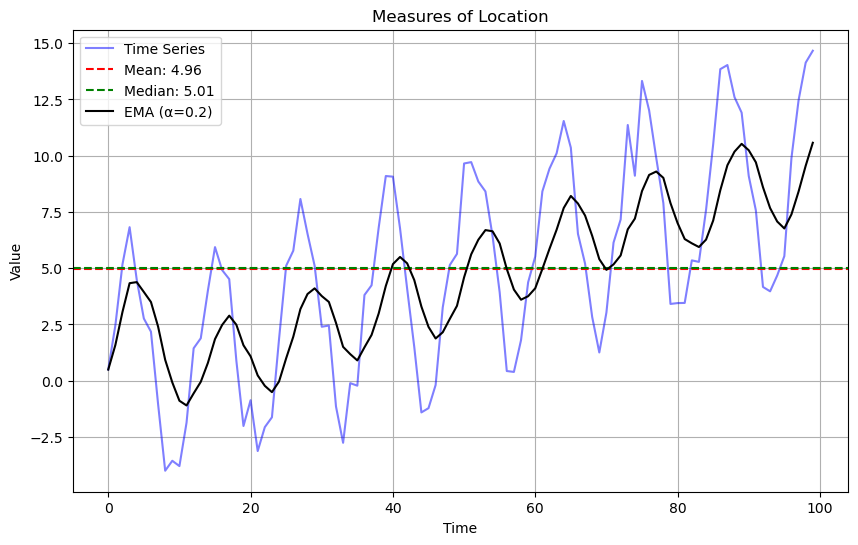

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series
np.random.seed(42)
t = np.arange(100)
trend = 0.1 * t
seasonality = 5 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 1, 100)
X = trend + seasonality + noise

# Calculate measures of location
mean = np.mean(X)
median = np.median(X)
ema = pd.Series(X).ewm(alpha=0.2).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, X, 'b-', label='Time Series', alpha=0.5)
plt.axhline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axhline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
plt.plot(t, ema, 'k-', label='EMA (α=0.2)')
plt.title('Measures of Location')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.savefig('measures_location.png')

---
## Measures of Variability
---
Variability measures inform forecast uncertainty and confidence intervals:

- **Variance**: Spread of the series or residuals.
$$ \sigma^2 = \frac{1}{T} \sum_{t=1}^T (x_t - \bar{x})^2 $$
- **Standard Deviation**: Square root of variance, used for prediction intervals.
$$ \sigma = \sqrt{\sigma^2} $$
- **Mean Absolute Error (MAE)**: Average absolute forecast error.
$$ \text{MAE} = \frac{1}{T} \sum_{t=1}^T |x_t - \hat{x}_t| $$

**Example**: For residuals $$ e_t = \{1, -0.5, 0.2, -1.2\} $, variance is:
$$ \sigma^2 = \frac{1^2 + (-0.5)^2 + 0.2^2 + (-1.2)^2}{4} = 0.6825 $$


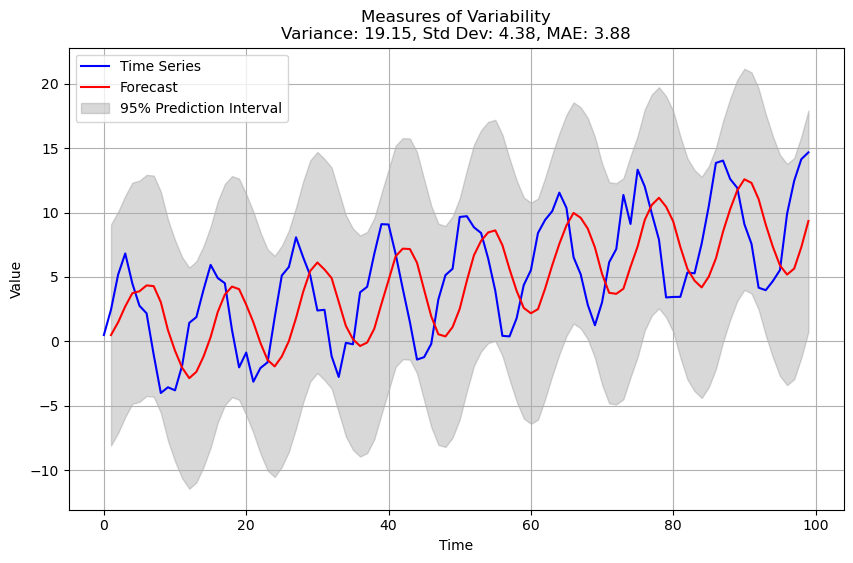

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series
np.random.seed(42)
t = np.arange(100)
trend = 0.1 * t
seasonality = 5 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 1, 100)
X = trend + seasonality + noise

# Moving average forecast
window = 5
forecast = pd.Series(X).rolling(window=window, min_periods=1).mean().shift(1)

# Calculate residuals, aligning X with non-NaN forecast values
valid_indices = forecast.notna()
residuals = X[valid_indices] - forecast[valid_indices]

# Calculate variability measures
variance = np.var(residuals)
std_dev = np.std(residuals)
mae = np.mean(np.abs(residuals))

# Plot time series with prediction intervals
plt.figure(figsize=(10, 6))
plt.plot(t, X, 'b-', label='Time Series')
plt.plot(t[valid_indices], forecast[valid_indices], 'r-', label='Forecast')
plt.fill_between(t[valid_indices], forecast[valid_indices] - 1.96 * std_dev,
                 forecast[valid_indices] + 1.96 * std_dev,
                 color='gray', alpha=0.3, label='95% Prediction Interval')
plt.title(f'Measures of Variability\nVariance: {variance:.2f}, Std Dev: {std_dev:.2f}, MAE: {mae:.2f}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.savefig('measures_variability.png')

---
## Measures of Association
---
Association measures help identify patterns for forecasting:


### 1. Autocorrelation (ACF)

**Definition**: Autocorrelation measures the correlation between a time series and a lagged version of itself. It quantifies how values at time $ t $ relate to values at time $ t+k $, where $ k $ is the lag. ACF is essential for detecting repeating patterns (e.g., seasonality) or dependencies in the data.

**Mathematical Formula**:
$$
\rho(k) = \frac{\sum_{t=1}^{T-k} (x_t - \bar{x})(x_{t+k} - \bar{x})}{\sum_{t=1}^T (x_t - \bar{x})^2}
$$
- $ x_t $: Time series value at time $ t $.
- $ \bar{x} $: Mean of the time series.
- $ k $: Lag (number of time steps).
- $ T $: Total number of observations.
- The numerator is the covariance between the series and its lagged version, adjusted for the mean.
- The denominator is the variance of the series, normalizing the correlation to range between -1 and 1.

**Interpretation**:
- **Positive ACF** at lag $ k $: Indicates that higher (or lower) values at time $ t $ are associated with higher (or lower) values at time $ t+k $.
- **Negative ACF**: Suggests an inverse relationship.
- **Significant spikes** in the ACF plot (outside confidence intervals, typically 95%) indicate meaningful correlations.
- **Seasonality**: For monthly data, a significant spike at lag 12 suggests annual seasonality.
- **Trends**: Slowly decaying ACF values often indicate a non-stationary series with a trend.

**Use in Forecasting**:
- ACF helps identify the order of autoregressive (AR) or moving average (MA) components in ARIMA models.
- Seasonal spikes guide the inclusion of seasonal terms in models like SARIMA.



### 2. Partial Autocorrelation (PACF)

**Definition**: PACF measures the correlation between a time series and its lagged values at lag $ k $, after removing the effects of all earlier lags (1, 2, ..., $ k-1 $). It isolates the direct relationship at lag $ k $.

**Calculation**:
- PACF is typically computed using methods like the Yule-Walker equations or regression techniques. For lag $ k $, it represents the correlation of $ x_t $ and $ x_{t+k} $ after regressing both on $ x_{t+1}, x_{t+2}, ..., x_{t+k-1} $ and removing their influence.
- Mathematically, for an autoregressive process, PACF at lag $ k $ corresponds to the coefficient $ \phi_k $ in the AR(k) model:
$$
x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} + \cdots + \phi_k x_{t-k} + \epsilon_t
$$

**Interpretation**:
- **Significant PACF** at lag $ k $: Indicates a direct relationship at that lag, useful for determining the order of an AR model.
- **Zero PACF** beyond a certain lag: Suggests that higher lags don’t contribute directly to the series (common in AR processes).
- **Seasonal patterns**: In seasonal data, PACF may show spikes at seasonal lags (e.g., lag 12 for monthly data).

**Use in Forecasting**:
- PACF is critical for specifying the AR order in ARIMA models. For example, if PACF is significant at lags 1 and 2 but near zero beyond, an AR(2) model may be appropriate.
- It helps distinguish direct effects from indirect correlations propagated through earlier lags.


### 3. Cross-Correlation

**Definition**: Cross-correlation measures the correlation between two different time series (or a time series and an external variable) at various lags. It’s used to identify whether one series leads or lags another, which is valuable when incorporating predictors in forecasting.

**Mathematical Formula**:
For two series $ x_t $ and $ y_t $, the cross-correlation at lag $ k $ is:
$$
\text{CCF}(k) = \frac{\sum_{t=1}^{T-k} (x_t - \bar{x})(y_{t+k} - \bar{y})}{\sqrt{\sum_{t=1}^T (x_t - \bar{x})^2 \sum_{t=1}^T (y_t - \bar{y})^2}}
$$
- Positive $ k $: $ y_t $ leads $ x_t $.
- Negative $ k $: $ x_t $ leads $ y_t $.
- The denominator normalizes by the standard deviations of both series.

**Interpretation**:
- A significant peak at lag $ k $ indicates that $ y_{t+k} $ is correlated with $ x_t $.
- For example, if the cross-correlation between sales ($ x_t $) and advertising spend ($ y_t $) peaks at lag 2, advertising may influence sales with a two-period delay.

**Use in Forecasting**:
- Cross-correlation identifies external variables (e.g., economic indicators, weather) that improve forecast accuracy.
- It informs the structure of models like VAR (Vector Autoregression) or transfer function models.

**Challenges**:
- Spurious correlations can arise if both series have trends or seasonality. Pre-whitening (e.g., differencing or fitting an ARIMA model) is often needed to isolate true relationships.
- Stationarity of both series is typically required for reliable results.

---

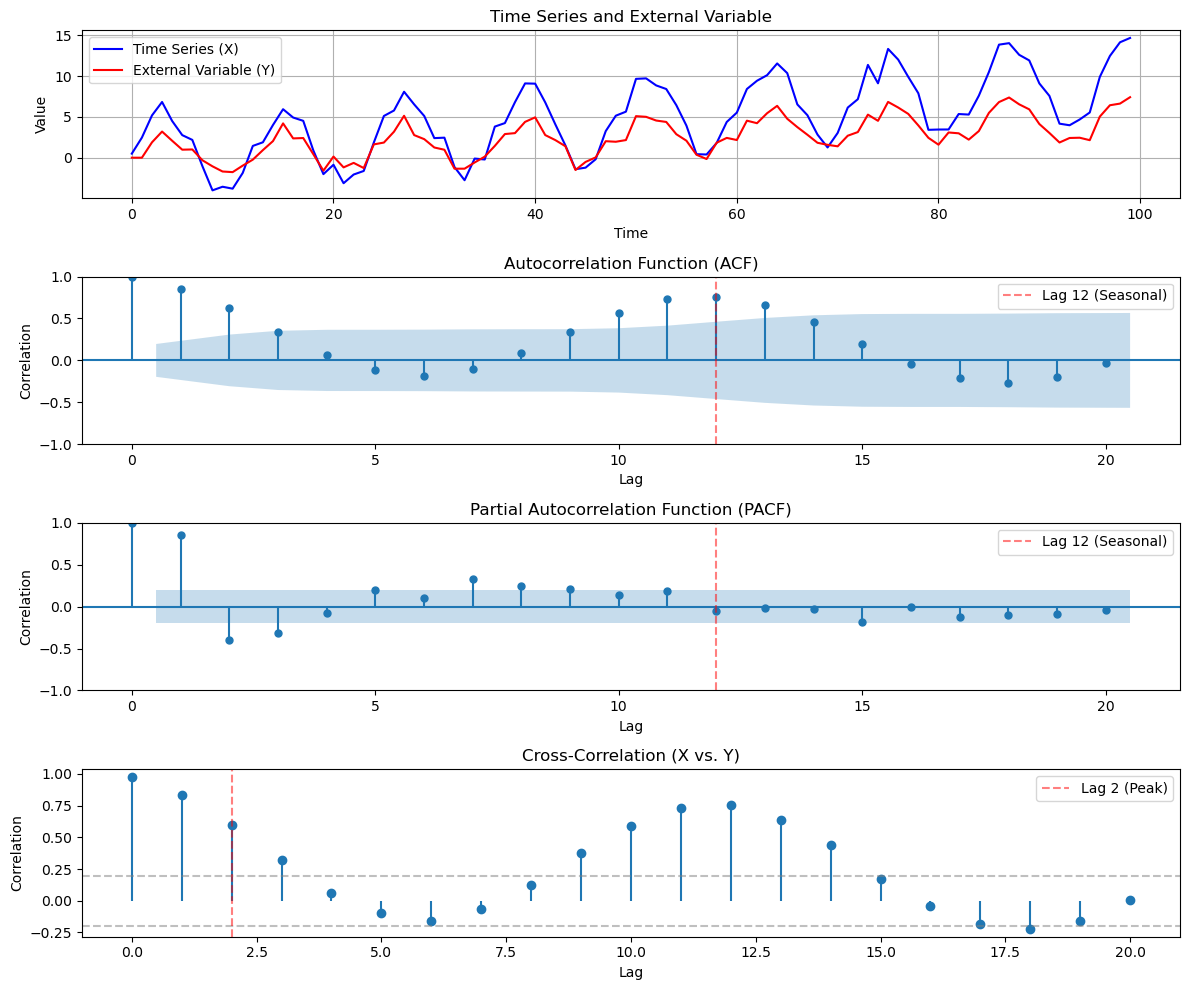

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf

# Generate synthetic time series with seasonality
np.random.seed(42)
t = np.arange(100)
trend = 0.1 * t
seasonality = 5 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 1, 100)
X = trend + seasonality + noise

# Generate an external variable (e.g., advertising spend) correlated with X
Y = 0.5 * X[2:] + np.random.normal(0, 0.5, 98)  # Lagged effect at lag 2
Y = np.concatenate([np.zeros(2), Y])  # Align lengths

# Plot time series and external variable
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, X, 'b-', label='Time Series (X)')
plt.plot(t, Y, 'r-', label='External Variable (Y)')
plt.title('Time Series and External Variable')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# ACF plot
plt.subplot(4, 1, 2)
plot_acf(X, lags=20, ax=plt.gca(), title='Autocorrelation Function (ACF)')
plt.axvline(x=12, color='r', linestyle='--', alpha=0.5, label='Lag 12 (Seasonal)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.legend()

# PACF plot
plt.subplot(4, 1, 3)
plot_pacf(X, lags=20, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')
plt.axvline(x=12, color='r', linestyle='--', alpha=0.5, label='Lag 12 (Seasonal)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.legend()

# Cross-correlation plot
plt.subplot(4, 1, 4)
lags = 20
ccf_values = ccf(X, Y, adjusted=False)[:lags+1]  # Positive lags only
plt.stem(range(lags+1), ccf_values, basefmt=' ')
plt.axhline(y=1.96/np.sqrt(len(X)), color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=-1.96/np.sqrt(len(X)), color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=2, color='r', linestyle='--', alpha=0.5, label='Lag 2 (Peak)')
plt.title('Cross-Correlation (X vs. Y)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.legend()

plt.tight_layout()
plt.savefig('measures_association_enhanced.png')

/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_25888/3346886218.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2018-01-01', periods=84, freq='M')


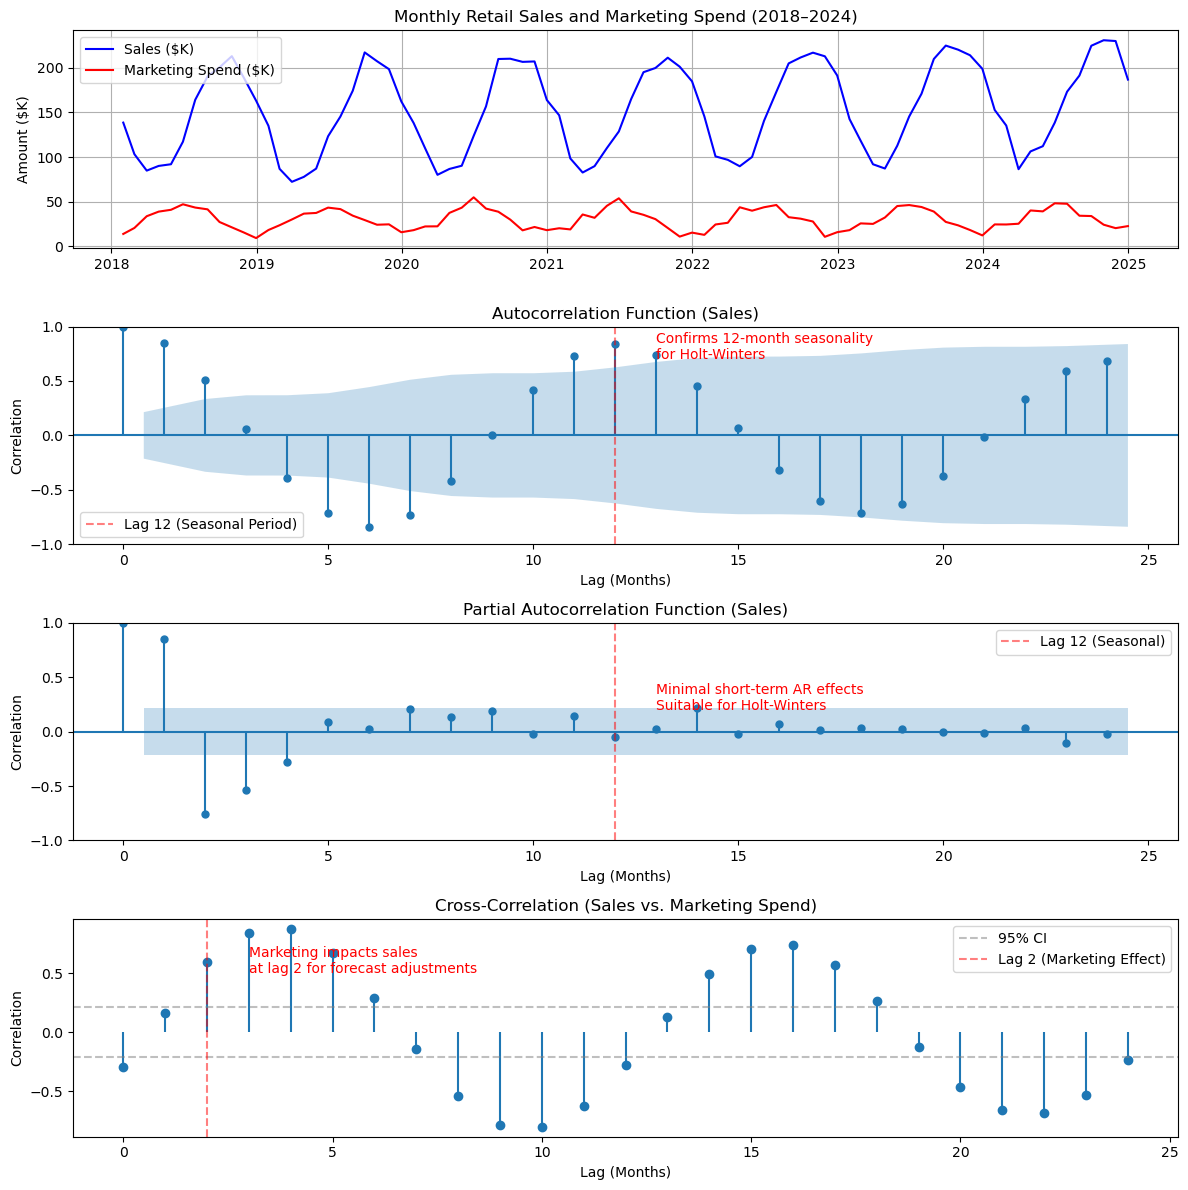

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf

# Generate synthetic retail sales data (84 months, Jan 2018 - Dec 2024)
np.random.seed(42)
t = np.arange(84)
trend = 0.3 * t  # Slight upward trend: $300/month increase
seasonality = 60 * np.sin(2 * np.pi * t / 12 + np.pi)  # Peak in December
noise = np.random.normal(0, 8, 84)  # Random noise
sales = 120 + trend + seasonality + noise  # Baseline sales $~$$120K

# Generate marketing spend, peaking in Oct/Nov
marketing = 30 + 15 * np.sin(2 * np.pi * (t - 2) / 12) + np.random.normal(0, 4, 84)
# Marketing affects sales with lag 2 (strong) and lag 1 (weak)
sales += 0.5 * np.roll(marketing, 2) + 0.2 * np.roll(marketing, 1)

# Create DataFrame with dates
dates = pd.date_range(start='2018-01-01', periods=84, freq='M')
df = pd.DataFrame({'Sales': sales, 'Marketing': marketing}, index=dates)

# Plot time series and measures of association
plt.figure(figsize=(12, 12))

# Time series plot
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Sales'], 'b-', label='Sales ($K)')
plt.plot(df.index, df['Marketing'], 'r-', label='Marketing Spend ($K)')
plt.title('Monthly Retail Sales and Marketing Spend (2018–2024)')
plt.ylabel('Amount ($K)')
plt.legend()
plt.grid(True)

# ACF plot
plt.subplot(4, 1, 2)
plot_acf(df['Sales'], lags=24, ax=plt.gca(), title='Autocorrelation Function (Sales)')
plt.axvline(x=12, color='r', linestyle='--', alpha=0.5, label='Lag 12 (Seasonal Period)')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.legend()
plt.text(13, 0.7, 'Confirms 12-month seasonality\nfor Holt-Winters', color='red')

# PACF plot
plt.subplot(4, 1, 3)
plot_pacf(df['Sales'], lags=24, ax=plt.gca(), title='Partial Autocorrelation Function (Sales)')
plt.axvline(x=12, color='r', linestyle='--', alpha=0.5, label='Lag 12 (Seasonal)')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.legend()
plt.text(13, 0.2, 'Minimal short-term AR effects\nSuitable for Holt-Winters', color='red')

# Cross-correlation plot
plt.subplot(4, 1, 4)
lags = 24
ccf_values = ccf(df['Sales'], df['Marketing'], adjusted=False)[:lags+1]  # Positive lags
plt.stem(range(lags+1), ccf_values, basefmt=' ')
plt.axhline(y=1.96/np.sqrt(len(df)), color='gray', linestyle='--', alpha=0.5, label='95% CI')
plt.axhline(y=-1.96/np.sqrt(len(df)), color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=2, color='r', linestyle='--', alpha=0.5, label='Lag 2 (Marketing Effect)')
plt.title('Cross-Correlation (Sales vs. Marketing Spend)')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.legend()
plt.text(3, 0.5, 'Marketing impacts sales\nat lag 2 for forecast adjustments', color='red')

plt.tight_layout()
plt.savefig('measures_association_holt_winters.png')

---
## Analyzing Distributions for Forecasting
---

Analyzing the distributions of a time series and its forecast residuals is critical to validate the assumptions of forecasting models like Holt-Winters, which relies on stable patterns and well-behaved errors for accurate predictions. The key aspects—stationarity, residual normality, skewness, and outliers—help diagnose model fit and ensure reliable forecasts. Here’s a deeper explanation of each:

1. **Stationarity**:
   - **Definition**: A time series is stationary if its statistical properties (mean, variance, autocorrelation) are constant over time. Holt-Winters assumes weak stationarity in the seasonal and residual components after accounting for trend and seasonality.
   - **Why It Matters**: Non-stationary data (e.g., with trends or changing variance) can lead to unreliable forecasts, as Holt-Winters may fail to capture evolving patterns. For example, a strong trend requires the trend component to be modeled correctly.
   - **Testing**: The **Augmented Dickey-Fuller (ADF) test** assesses stationarity:
     - Null hypothesis ($ H_0 $): The series has a unit root (non-stationary).
     - Alternative hypothesis ($ H_1 $): The series is stationary.
     - A low p-value (< 0.05) rejects $ H_0 $, indicating stationarity.
   - **Application**: For Holt-Winters, apply the ADF test to the differenced series (e.g., after removing trend and seasonality) to confirm that residuals or deseasonalized data are stationary.

2. **Residual Normality**:
   - **Definition**: Residuals (forecast errors, $ e_t = x_t - \hat{x}_t $) should ideally follow a normal distribution with mean zero for valid confidence intervals and statistical inference.
   - **Why It Matters**: Non-normal residuals (e.g., skewed or heavy-tailed) suggest model misspecification, such as unmodeled patterns or outliers, which can distort prediction intervals. Holt-Winters assumes residuals are approximately normal to produce reliable uncertainty estimates.
   - **Testing**: Use a **Q-Q plot** to visually check normality (points should align with a straight line) or statistical tests like Shapiro-Wilk (though less common in time series due to autocorrelation).
   - **Application**: If residuals deviate from normality, consider adjusting the Holt-Winters model (e.g., switching from additive to multiplicative seasonality) or preprocessing the data (e.g., log transformation).

3. **Skewness**:
   - **Definition**: Skewness measures the asymmetry of the residual distribution:
     $$
     \text{Skewness} = \frac{\frac{1}{T} \sum_{t=1}^T (e_t - \bar{e})^3}{\sigma_e^3}
     $$
     where $ e_t $ is the residual, $ \bar{e} $ is the mean (ideally $~$0), and $ \sigma_e $ is the standard deviation.
     - Positive skewness: Right tail (overestimation errors).
     - Negative skewness: Left tail (underestimation errors).
     - Zero skewness: Symmetric distribution.
   - **Why It Matters**: Skewed residuals indicate bias in the model. For example, right-skewed residuals suggest the model underestimates high sales, which is critical for inventory planning in retail.
   - **Application**: In Holt-Winters, skewness may signal incorrect seasonality (e.g., additive vs. multiplicative) or unmodeled effects (e.g., external factors like promotions).

4. **Outliers**:
   - **Definition**: Outliers are extreme residuals (e.g., beyond 3 standard deviations) that deviate significantly from the expected pattern.
   - **Why It Matters**: Outliers can indicate model misspecification (e.g., missing a one-time event like a major sale) or data errors, leading to poor forecasts. Holt-Winters is sensitive to outliers, as they can distort smoothing parameters.
   - **Testing**: Identify outliers using a residual histogram or boxplot, or flag values beyond a threshold (e.g., $ |e_t| > 3\sigma_e $).
   - **Application**: Investigate outliers to determine if they reflect real events (e.g., a Black Friday spike) or errors, and consider robust adjustments (e.g., damping extreme values) or adding external regressors.


/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_25888/1870635950.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2018-01-01', periods=84, freq='M')


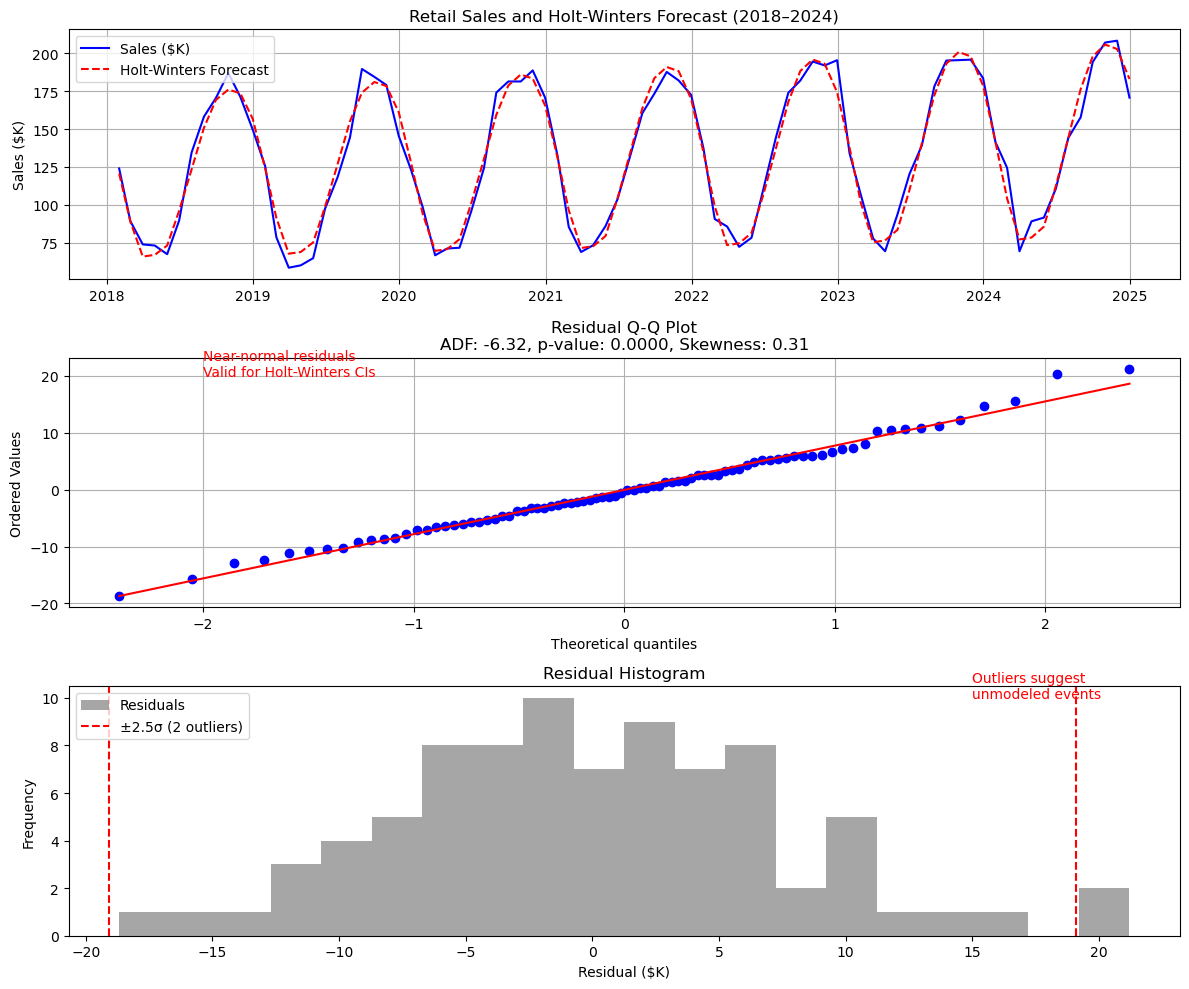

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import probplot, skew

# Generate synthetic retail sales data (84 months, Jan 2018 - Dec 2024)
np.random.seed(42)
t = np.arange(84)
trend = 0.3 * t  # Trend: $300/month increase
seasonality = 60 * np.sin(2 * np.pi * t / 12 + np.pi)  # Peak in December
noise = np.random.normal(0, 8, 84)  # Noise
sales = 120 + trend + seasonality + noise  # Baseline $~$$120K
# Add outliers for Dec 2020 and Dec 2022
sales[35] += 20  # Dec 2020 (index 35)
sales[59] += 20  # Dec 2022 (index 59)

# Create DataFrame
dates = pd.date_range(start='2018-01-01', periods=84, freq='M')
df = pd.DataFrame({'Sales': sales}, index=dates)

# Holt-Winters forecast (one-step-ahead)
model = ExponentialSmoothing(df['Sales'], seasonal='mul', seasonal_periods=12, trend='add')
fit = model.fit()
forecast = fit.fittedvalues

# Calculate residuals, aligning with valid indices
valid_indices = forecast.notna()
residuals = df['Sales'][valid_indices] - forecast[valid_indices]

# Stationarity test (ADF) on differenced series
adf_result = adfuller(df['Sales'].diff().dropna())
adf_stat, p_value = adf_result[0], adf_result[1]

# Residual skewness
skewness = skew(residuals)

# Outlier detection
std_residuals = np.std(residuals)
outliers = np.abs(residuals) > 2.5 * std_residuals
outlier_count = np.sum(outliers)

# Plot analysis
plt.figure(figsize=(12, 10))

# Time series and forecast
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Sales'], 'b-', label='Sales ($K)')
plt.plot(df.index, forecast, 'r--', label='Holt-Winters Forecast')
plt.title('Retail Sales and Holt-Winters Forecast (2018–2024)')
plt.ylabel('Sales ($K)')
plt.legend()
plt.grid(True)

# Q-Q plot for normality
plt.subplot(3, 1, 2)
probplot(residuals, dist="norm", plot=plt)
plt.title(f'Residual Q-Q Plot\nADF: {adf_stat:.2f}, p-value: {p_value:.4f}, Skewness: {skewness:.2f}')
plt.text(-2, 20, 'Near-normal residuals\nValid for Holt-Winters CIs', color='red')
plt.grid(True)

# Residual histogram for outliers
plt.subplot(3, 1, 3)
plt.hist(residuals, bins=20, alpha=0.7, color='gray', label='Residuals')
plt.axvline(2.5 * std_residuals, color='r', linestyle='--', label=f'±2.5σ ({outlier_count} outliers)')
plt.axvline(-2.5 * std_residuals, color='r', linestyle='--')
plt.title('Residual Histogram')
plt.xlabel('Residual ($K)')
plt.ylabel('Frequency')
plt.legend()
plt.text(15, 10, f'Outliers suggest\nunmodeled events', color='red')

plt.tight_layout()
plt.savefig('analyze_distributions_holt_winters.png')

In [ ]:
# Your code here